In [9]:
import glob
from io import open
import bibtexparser
from bibtexparser.bparser import BibTexParser
import pandas as pd
from pandas import DataFrame as df
from os import path

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
open("polyethnic.html", "r").read()

u'<!DOCTYPE html>\n<html class=" js canvas csscolumns video audio" id="ctl00__htmlTag" lang="en"><head><script src="polyethnic_files/analytics.js" async="" type="text/javascript"></script><script src="polyethnic_files/gtm.js" async=""></script><script src="polyethnic_files/master.js"></script><script src="polyethnic_files/underscore.js"></script><script src="polyethnic_files/jqueryplusui.js"></script><title>\n\tEBSCOhost\n</title><meta http-equiv="content-type" content="text/html; charset=UTF-8"><link rel="icon" href="http://smallcontent.ebsco-content.com/interfacefiles/15.4.0.145.1/ehost/favicon.ico" type="image/x-icon">\n<link rel="shortcut icon" href="http://smallcontent.ebsco-content.com/interfacefiles/15.4.0.145.1/ehost/favicon.ico" type="image/x-icon">\n\n\t\t<link rel="stylesheet" type="text/css" href="polyethnic_files/master_bundle.css" media="All">\n<link rel="stylesheet" type="text/css" href="polyethnic_files/abody.css" media="All">\n<link rel="stylesheet" type="text/css" hre

## Merge bibtex databases

In [24]:
dfs = []
for file in glob.glob("PsycINFO/*"):
  word = path.basename(file).split('.')[0]
  with open(file, 'rb') as bibtex_file:
    parser = BibTexParser()
    bib_database = bibtexparser.load(bibtex_file, parser=parser)
    df_ = df.from_records(bib_database.entries)
    df_.insert(0, "word", [word]*len(df_))
    dfs.append(df_)

In [28]:
words_df = pd.concat(dfs)

In [32]:
words_df.to_csv("psychinfo_combined.csv", encoding='utf-8')

## Load PsychINFO unified database

In [48]:
psychinfo = df.from_csv("psychinfo_combined.csv", encoding='utf-8')

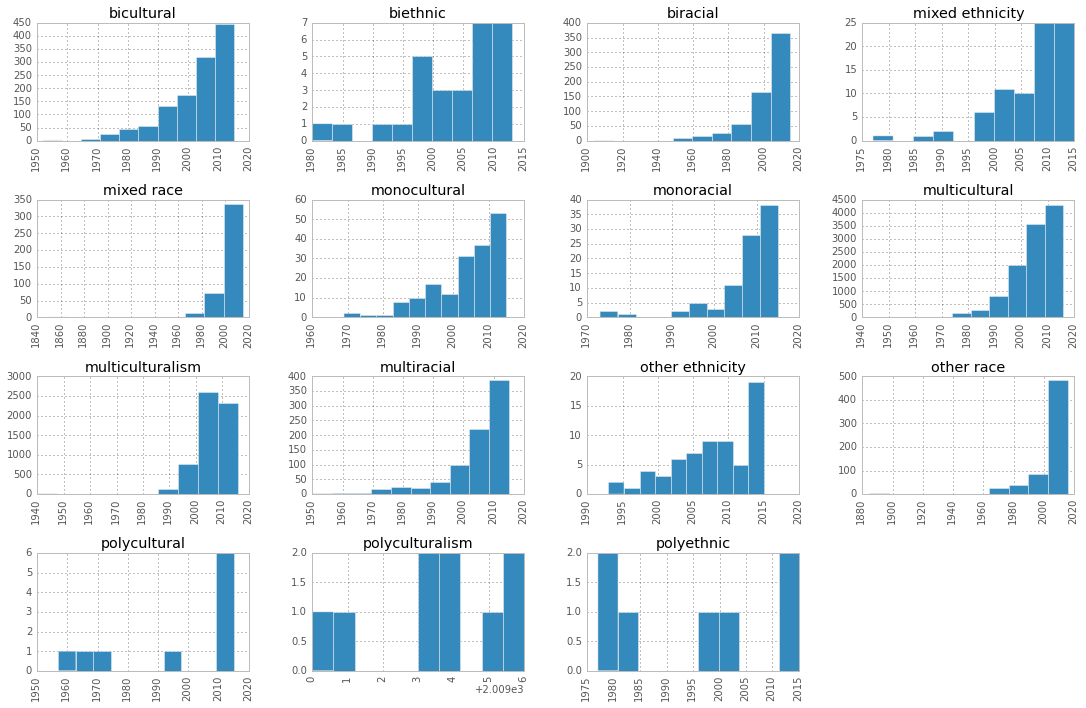

In [58]:
_ = psychinfo[['word', 'year']].hist(figsize=(18,12), by='word')